In [1]:
%load_ext autoreload

# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



In [2]:
%autoreload 2
from src import ODE_euler


[08-07 13:39:59][INFO] 2025-08-07 13:39:59.510806
[08-07 13:39:59][INFO] PC| 2025-08-07 13:39:59.609107
[08-07 13:39:59][INFO] 2025-08-07 13:39:59.617620
[08-07 13:39:59][INFO] PC| 2025-08-07 13:39:59.619778


In [3]:
# Definir la función f(t, y) de la ODE
def f(t, y):
    return -5 * y + 5 * t**2 + 2 * t

# Parámetros del problema
a = 0
b = 1
y_t0 = 1/3
N = 10

# Usar el método de Euler
from src import ODE_euler

ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

# Mostrar resultados
print(f"h = {h}")
print("t\t\t y (Euler)")
for t, y in zip(ts, ys):
    print(f"{t:.4f}\t {y:.6f}")

h = 0.1
t		 y (Euler)
0.0000	 0.333333
0.1000	 0.166667
0.2000	 0.108333
0.3000	 0.114167
0.4000	 0.162083
0.5000	 0.241042
0.6000	 0.345521
0.7000	 0.472760
0.8000	 0.621380
0.9000	 0.790690
1.0000	 0.980345


## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



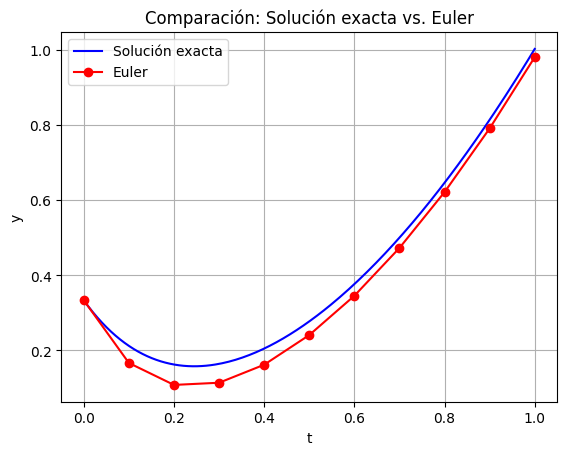

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Solución exacta
def y_real(t):
    return t**2 + (1/3)*np.exp(-5*t)

# Convertir ts y ys a arrays para graficar
ts_np = np.array(ts)
ys_np = np.array(ys)

# Crear puntos para la solución exacta (más denso para curva suave)
t_exact = np.linspace(0, 1, 200)
y_exact = y_real(t_exact)

plt.plot(t_exact, y_exact, label="Solución exacta", color="blue")
plt.plot(ts_np, ys_np, 'o-', label="Euler", color="red")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Comparación: Solución exacta vs. Euler")
plt.legend()
plt.grid(True)
plt.show()

# Errores
Calcule el eeror relativo para diferentes valores de N.

In [6]:
import numpy as np
from src import ODE_euler

def f(t, y):
    return -5 * y + 5 * t**2 + 2 * t

def y_real(t):
    return t**2 + (1/3)*np.exp(-5*t)

for N in [5, 10, 20]:
    ys, ts, h = ODE_euler(a=0, b=1, f=f, y_t0=1/3, N=N)
    ts_np = np.array(ts)
    ys_np = np.array(ys)
    y_exact = y_real(ts_np)
    error_rel = np.abs((ys_np - y_exact) / y_exact)
    print(f"N = {N}")
    print(f"  Error relativo promedio: {np.mean(error_rel):.6e}")

N = 5
  Error relativo promedio: 2.797909e-01
N = 10
  Error relativo promedio: 1.290954e-01
N = 20
  Error relativo promedio: 6.314570e-02
